In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Loading data for each activity as per 1(a)

In [2]:
import os
directories = os.listdir("data")
data_hash = {}
directories = directories[1:]
for direc in directories:
    files = os.listdir("data/" + direc)
    for file in files:
        if direc == "bending2" and file == "dataset4.csv":
            new_names = ['Time','Avg_RSS12', 'Var_RSS12', 'Avg_RSS13', 'Var_RSS13', 'Avg_RSS23', 'Var_RSS23', 'del']
            data_hash[direc + "_" + file] = pd.read_csv("data/" + direc + "/" + file, delimiter=" ", skiprows=5, names=new_names).drop(["del"], axis=1)
        else:
            new_names = ['Time','Avg_RSS12', 'Var_RSS12', 'Avg_RSS13', 'Var_RSS13', 'Avg_RSS23', 'Var_RSS23']
            data_hash[direc + "_" + file] = pd.read_csv("data/" + direc + "/" + file, delimiter=",", skiprows=5, names=new_names)

In [3]:
data_hash["bending1_dataset1.csv"]

,Time,Avg_RSS12,Var_RSS12,Avg_RSS13,Var_RSS13,Avg_RSS23,Var_RSS23
0,0,39.25,0.43,22.75,0.43,33.75,1.30
1,250,39.25,0.43,23.00,0.00,33.00,0.00
2,500,39.25,0.43,23.25,0.43,33.00,0.00
3,750,39.50,0.50,23.00,0.71,33.00,0.00
4,1000,39.50,0.50,24.00,0.00,33.00,0.00
5,1250,39.25,0.43,24.00,0.00,33.00,0.00
6,1500,39.25,0.43,24.00,0.00,33.00,0.00
7,1750,39.00,0.00,23.75,0.43,33.00,0.00
8,2000,39.50,0.50,24.00,0.00,33.00,0.00
9,2250,39.50,0.50,23.00,0.00,33.00,0.00


# Splitting data into testing and training set as per 1(b)

In [4]:
testing_set_keys = ['bending1_dataset1.csv', 'bending1_dataset2.csv','bending2_dataset1.csv', 'bending2_dataset2.csv',
                   'cycling_dataset1.csv', 'cycling_dataset2.csv', 'cycling_dataset3.csv', 
                   'walking_dataset1.csv', 'walking_dataset2.csv', 'walking_dataset3.csv',
                   'sitting_dataset1.csv', 'sitting_dataset2.csv', 'sitting_dataset3.csv',
                   'standing_dataset1.csv', 'standing_dataset2.csv', 'standing_dataset3.csv',
                   'lying_dataset1.csv', 'lying_dataset2.csv', 'lying_dataset3.csv']
testing_hash = {}
training_hash = {}
for key, val in data_hash.items():
    if key in testing_set_keys:
        testing_hash[key] = val
    else:
        training_hash[key] = val

# Types of time-domain features are usually used in time series classification 1(c)(i)

Minimum, Maximum, Mean, Median, Standard Deviation, First Quartile, Third Quartile, Skewness, Kurtosis


# Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance as per 1(c)(ii)

In [5]:
import statistics as stat
dataframs = list(data_hash.values())
stats_total_data = []
k = 1
for datafram in dataframs:
    stat_per_dataframe = [k]
    names = ["Instance"]
    for index, col in enumerate(datafram.columns[1:]):
        mini = min(datafram[col])
        maxi = max(datafram[col])
        mean = stat.mean(datafram[col])
        median = stat.median(datafram[col])
        std = datafram[col].std()
        first_quartile = datafram[col].quantile(0.25)
        third_quartile = datafram[col].quantile(0.75)
        
        stat_per_dataframe.append(mini)
        stat_per_dataframe.append(maxi)
        stat_per_dataframe.append(mean)
        stat_per_dataframe.append(median)
        stat_per_dataframe.append(std)
        stat_per_dataframe.append(first_quartile)
        stat_per_dataframe.append(third_quartile)
        
        names.append(col + "_minimum")
        names.append(col + "_maximum")
        names.append(col + "_mean")
        names.append(col + "_median")
        names.append(col + "_standard deviation")
        names.append(col + "_first quartile")
        names.append(col + "_third quartile")
        
    k+=1
    stats_total_data.append(stat_per_dataframe)

time_domain = pd.DataFrame(stats_total_data, columns=names)
time_domain.set_index('Instance', inplace=True)
time_domain


,Avg_RSS12_minimum,Avg_RSS12_maximum,Avg_RSS12_mean,Avg_RSS12_median,Avg_RSS12_standard deviation,Avg_RSS12_first quartile,Avg_RSS12_third quartile,Var_RSS12_minimum,Var_RSS12_maximum,Var_RSS12_mean,...,Avg_RSS23_standard deviation,Avg_RSS23_first quartile,Avg_RSS23_third quartile,Var_RSS23_minimum,Var_RSS23_maximum,Var_RSS23_mean,Var_RSS23_median,Var_RSS23_standard deviation,Var_RSS23_first quartile,Var_RSS23_third quartile
Instance,,,,,,,,,,,,,,,,,,,,,
1,37.25,45.00,40.624792,40.500,1.476967,39.2500,42.0000,0.0,1.30,0.358604,...,2.188449,33.0000,36.0000,0.00,1.92,0.570583,0.430,0.582915,0.0000,1.3000
2,38.00,45.67,42.812812,42.500,1.435550,42.0000,43.6700,0.0,1.22,0.372437,...,1.995255,32.0000,34.5000,0.00,3.11,0.571083,0.430,0.601010,0.0000,1.3000
3,35.00,47.40,43.954500,44.330,1.558835,43.0000,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.5000,0.00,1.79,0.493292,0.430,0.513506,0.0000,0.9400
4,33.00,47.75,42.179812,43.500,3.670666,39.1500,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.3300,0.00,2.18,0.613521,0.500,0.524317,0.0000,1.0000
5,33.00,45.75,41.678063,41.750,2.243490,41.3300,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.2500,0.00,1.79,0.383292,0.430,0.389164,0.0000,0.5000
6,37.00,48.00,43.454958,43.250,1.386098,42.5000,45.0000,0.0,1.58,0.378083,...,2.488862,22.2500,24.0000,0.00,5.26,0.679646,0.500,0.622534,0.4300,0.8700
7,36.25,48.00,43.969125,44.500,1.618364,43.3100,44.6700,0.0,1.50,0.413125,...,3.318301,20.5000,23.7500,0.00,2.96,0.555312,0.490,0.487826,0.0000,0.8300
8,12.75,51.00,24.562958,24.250,3.737514,23.1875,26.5000,0.0,6.87,0.590833,...,3.693786,20.5000,27.0000,0.00,4.97,0.700187,0.500,0.693720,0.4300,0.8700
9,0.00,42.75,27.464604,28.000,3.583582,25.5000,30.0000,0.0,7.76,0.449708,...,5.053642,15.0000,20.7500,0.00,6.76,1.122125,0.830,1.012342,0.4700,1.3000


# Method to build a 90% bootsrap confidence interval for the standard deviationof each feature as per 1(c)(iii)

In [6]:
confidence_interval = {}
for col in time_domain.columns:
    statistics = []
    for i in range(0,1000):
        sample = time_domain[col].sample(n=88)
        stat = sample.std()
        statistics.append(stat)
    statistics.sort()
    lower = np.percentile(statistics, 0.05)
    upper = np.percentile(statistics, 0.95)
    confidence_interval[col] = [lower,upper]

In [7]:
confidence_interval

{'Avg_RSS12_first quartile': [6.153589724185369, 6.15358972418537],
 'Avg_RSS12_maximum': [4.394361684703188, 4.394361684703189],
 'Avg_RSS12_mean': [5.335717658344173, 5.335717658344173],
 'Avg_RSS12_median': [5.440054137152633, 5.440054137152634],
 'Avg_RSS12_minimum': [9.569975284512804, 9.569975284512806],
 'Avg_RSS12_standard deviation': [1.7721533975028403, 1.7721533975028403],
 'Avg_RSS12_third quartile': [5.138924613450996, 5.138924613450997],
 'Avg_RSS13_first quartile': [4.220657884507629, 4.220657884507629],
 'Avg_RSS13_maximum': [4.875136693954742, 4.875136693954743],
 'Avg_RSS13_mean': [4.008380131777646, 4.008380131777647],
 'Avg_RSS13_median': [4.036396318784072, 4.036396318784073],
 'Avg_RSS13_minimum': [2.9564620592058164, 2.956462059205817],
 'Avg_RSS13_standard deviation': [0.946710262075295, 0.9467102620752952],
 'Avg_RSS13_third quartile': [4.171628224016795, 4.1716282240167954],
 'Avg_RSS23_first quartile': [6.096465201564948, 6.096465201564949],
 'Avg_RSS23_maxim

#  The three most important time-domain features as per 1(c)(iv)

Min, Mean, and Max

# Binary Classification Using Logistic Regression

# Scatter plots of the features extracted from time series 1, 2, and 6 of each instance as per 1(d)(i)

In [8]:
import seaborn as sns
features_to_keep = []
features_to_keep = ["Avg_RSS12_minimum", "Avg_RSS12_maximum", "Avg_RSS12_mean", "Var_RSS12_minimum", "Var_RSS12_maximum", "Var_RSS12_mean", "Var_RSS23_minimum", "Var_RSS23_maximum", "Var_RSS23_mean"]
scatter_data = time_domain[features_to_keep]

scatter_data["bending"] = [1]*13 + [0]*75
scatter_data

,Avg_RSS12_minimum,Avg_RSS12_maximum,Avg_RSS12_mean,Var_RSS12_minimum,Var_RSS12_maximum,Var_RSS12_mean,Var_RSS23_minimum,Var_RSS23_maximum,Var_RSS23_mean,bending
Instance,,,,,,,,,,
1,37.25,45.00,40.624792,0.0,1.30,0.358604,0.00,1.92,0.570583,1
2,38.00,45.67,42.812812,0.0,1.22,0.372437,0.00,3.11,0.571083,1
3,35.00,47.40,43.954500,0.0,1.70,0.426250,0.00,1.79,0.493292,1
4,33.00,47.75,42.179812,0.0,3.00,0.696042,0.00,2.18,0.613521,1
5,33.00,45.75,41.678063,0.0,2.83,0.535979,0.00,1.79,0.383292,1
6,37.00,48.00,43.454958,0.0,1.58,0.378083,0.00,5.26,0.679646,1
7,36.25,48.00,43.969125,0.0,1.50,0.413125,0.00,2.96,0.555312,1
8,12.75,51.00,24.562958,0.0,6.87,0.590833,0.00,4.97,0.700187,1
9,0.00,42.75,27.464604,0.0,7.76,0.449708,0.00,6.76,1.122125,1


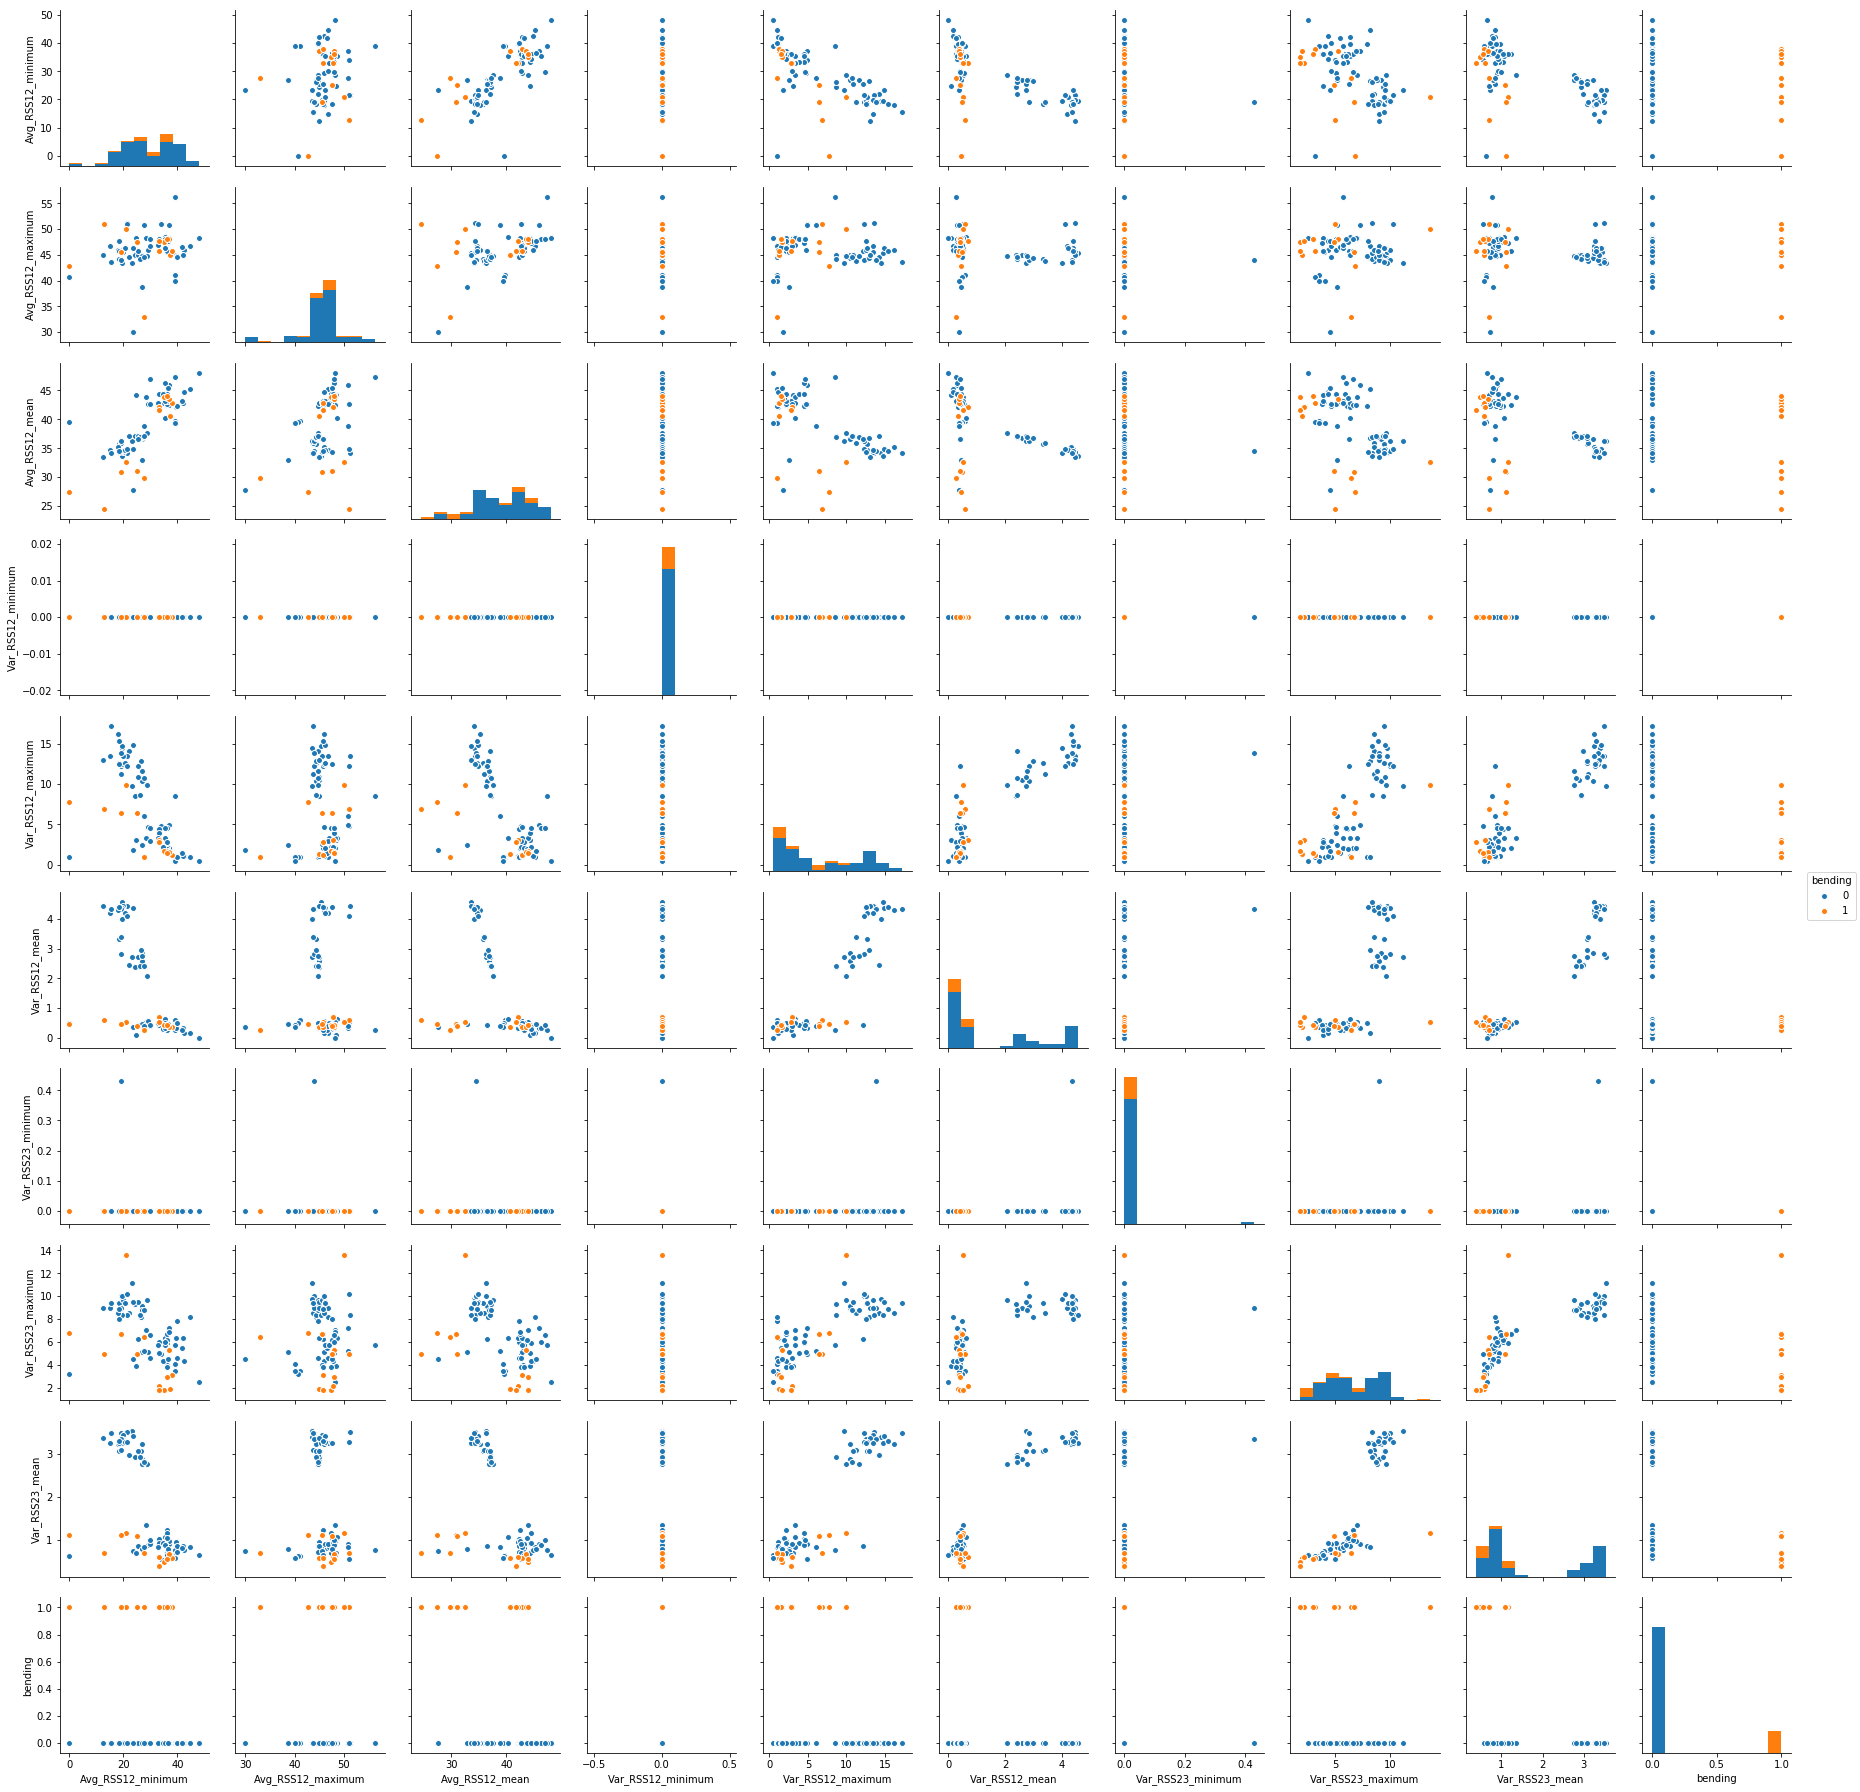

In [9]:
sns.pairplot(scatter_data, hue="bending")

In [10]:
new_data_hash = {}

for key, datafra in data_hash.items():

    if key == "sitting_dataset8.csv":
        
        Avg_RSS12 = datafra["Avg_RSS12"][0:239]
        Avg_RSS12_1 = datafra["Avg_RSS12"][240:]

        Var_RSS12 = datafra["Var_RSS12"][0:239]
        Var_RSS12_1 = datafra["Var_RSS12"][240:]

        Avg_RSS13 = datafra["Avg_RSS13"][0:239]
        Avg_RSS13_1 = datafra["Avg_RSS13"][240:]

        Var_RSS13 = datafra["Var_RSS13"][0:239]
        Var_RSS13_1 = datafra["Var_RSS13"][240:]

        Avg_RSS23 = datafra["Avg_RSS23"][0:239]
        Avg_RSS23_1 = datafra["Avg_RSS23"][240:]

        Var_RSS23 = datafra["Var_RSS23"][0:239]
        Var_RSS23_1 = datafra["Var_RSS23"][240:]
    else:
        Avg_RSS12 = datafra["Avg_RSS12"][0:240]
        Avg_RSS12_1 = datafra["Avg_RSS12"][240:]

        Var_RSS12 = datafra["Var_RSS12"][0:240]
        Var_RSS12_1 = datafra["Var_RSS12"][240:]

        Avg_RSS13 = datafra["Avg_RSS13"][0:240]
        Avg_RSS13_1 = datafra["Avg_RSS13"][240:]

        Var_RSS13 = datafra["Var_RSS13"][0:240]
        Var_RSS13_1 = datafra["Var_RSS13"][240:]

        Avg_RSS23 = datafra["Avg_RSS23"][0:240]
        Avg_RSS23_1 = datafra["Avg_RSS23"][240:]

        Var_RSS23 = datafra["Var_RSS23"][0:240]
        Var_RSS23_1 = datafra["Var_RSS23"][240:]

    new_data_hash[key] = pd.DataFrame(
                                        {
                                         'Avg_RSS12': list(Avg_RSS12),
                                         'Var_RSS12': list(Var_RSS12),
                                         'Avg_RSS13': list(Avg_RSS13),
                                         'Var_RSS13': list(Var_RSS13),
                                         'Avg_RSS23': list(Avg_RSS23),
                                         'Var_RSS23': list(Var_RSS23),
                                         'Avg_RSS12_1': list(Avg_RSS12_1),
                                         'Var_RSS12_1': list(Var_RSS12_1),
                                         'Avg_RSS13_1': list(Avg_RSS13_1),
                                         'Var_RSS13_1': list(Var_RSS13_1),
                                         'Avg_RSS23_1': list(Avg_RSS23_1),
                                         'Var_RSS23_1': list(Var_RSS23_1),  
                                        })
new_data_hash['bending1_dataset3.csv']

,Avg_RSS12,Avg_RSS12_1,Avg_RSS13,Avg_RSS13_1,Avg_RSS23,Avg_RSS23_1,Var_RSS12,Var_RSS12_1,Var_RSS13,Var_RSS13_1,Var_RSS23,Var_RSS23_1
0,42.00,43.33,21.25,18.00,30.00,35.67,0.71,0.94,0.43,0.00,0.00,0.47
1,41.50,44.20,20.25,19.75,31.25,35.40,0.50,0.75,1.48,0.83,1.09,1.20
2,41.50,45.00,14.25,21.75,33.00,35.00,0.50,0.00,1.92,0.83,0.00,1.41
3,40.75,45.00,15.75,23.33,33.00,36.00,0.83,0.00,0.43,0.47,0.00,0.00
4,40.00,45.00,20.00,24.00,32.75,36.00,0.71,0.00,2.74,0.00,0.43,0.00
5,41.25,45.50,24.25,24.00,31.50,36.25,0.83,0.50,0.43,0.00,0.87,0.43
6,42.25,46.25,23.75,24.00,35.25,36.25,0.43,0.43,0.43,0.00,1.30,0.43
7,43.50,45.50,21.00,24.00,36.00,36.00,0.87,0.50,0.00,0.00,0.00,0.00
8,42.75,45.00,21.25,21.25,36.00,36.00,0.83,0.00,0.43,0.43,0.00,0.00
9,43.25,44.75,23.75,18.75,36.00,34.50,0.43,0.43,0.43,1.30,0.00,1.50


# Break each time series in your training set into two (approximately) equal length time series and repeat 1(d)i as per 1(d)(ii)

In [11]:
import statistics as stat
dataframs = list(new_data_hash.values())
stats_total_data = []
k = 1
for datafram in dataframs:
    stat_per_dataframe = [k]
    names = ["Instance"]
    for index, col in enumerate(datafram.columns[0:]):
        mini = min(datafram[col])
        maxi = max(datafram[col])
        mean = stat.mean(datafram[col])
        median = stat.median(datafram[col])
        std = datafram[col].std()
        first_quartile = datafram[col].quantile(0.25)
        third_quartile = datafram[col].quantile(0.75)
        
        stat_per_dataframe.append(mini)
        stat_per_dataframe.append(maxi)
        stat_per_dataframe.append(mean)
        stat_per_dataframe.append(median)
        stat_per_dataframe.append(std)
        stat_per_dataframe.append(first_quartile)
        stat_per_dataframe.append(third_quartile)
        
        names.append(col + "_minimum")
        names.append(col + "_maximum")
        names.append(col + "_mean")
        names.append(col + "_median")
        names.append(col + "_standard deviation")
        names.append(col + "_first quartile")
        names.append(col + "_third quartile")
        
    k+=1
    stats_total_data.append(stat_per_dataframe)

new_time_domain = pd.DataFrame(stats_total_data, columns=names)
new_time_domain.set_index('Instance', inplace=True)
new_time_domain

,Avg_RSS12_minimum,Avg_RSS12_maximum,Avg_RSS12_mean,Avg_RSS12_median,Avg_RSS12_standard deviation,Avg_RSS12_first quartile,Avg_RSS12_third quartile,Avg_RSS12_1_minimum,Avg_RSS12_1_maximum,Avg_RSS12_1_mean,...,Var_RSS23_standard deviation,Var_RSS23_first quartile,Var_RSS23_third quartile,Var_RSS23_1_minimum,Var_RSS23_1_maximum,Var_RSS23_1_mean,Var_RSS23_1_median,Var_RSS23_1_standard deviation,Var_RSS23_1_first quartile,Var_RSS23_1_third quartile
Instance,,,,,,,,,,,,,,,,,,,,,
1,38.00,42.33,40.946958,41.250,1.102963,40.3100,42.0000,37.25,45.00,40.302625,...,0.647856,0.0000,1.3000,0.00,1.92,0.552167,0.430,0.510494,0.0000,0.9400
2,41.75,44.25,42.643292,42.500,0.641849,42.0000,43.3300,38.00,45.67,42.982333,...,0.624834,0.0000,1.3000,0.00,3.11,0.533583,0.430,0.575061,0.0000,0.8700
3,36.50,46.50,44.057167,44.500,1.556971,43.2500,45.0000,35.00,47.40,43.851833,...,0.526656,0.0000,1.0000,0.00,1.50,0.388333,0.000,0.478528,0.0000,0.7100
4,33.75,47.75,43.278875,45.000,3.473355,42.0000,45.2500,33.00,46.00,41.080750,...,0.554542,0.0000,1.2200,0.00,2.18,0.586083,0.470,0.491873,0.0000,0.8700
5,33.00,45.75,41.621208,42.330,3.118644,39.6525,44.2500,39.25,43.67,41.734917,...,0.411200,0.0000,0.7100,0.00,1.50,0.347500,0.430,0.363144,0.0000,0.5000
6,39.00,48.00,44.117042,45.000,1.359836,43.5000,45.0000,37.00,46.50,42.792875,...,0.718016,0.4300,1.1200,0.00,4.06,0.543875,0.500,0.473445,0.4300,0.7100
7,36.67,45.00,43.486208,43.710,1.281976,42.3300,44.5000,36.25,48.00,44.452042,...,0.486847,0.0000,0.8300,0.00,2.96,0.585750,0.500,0.487918,0.4225,0.8300
8,12.75,51.00,24.675375,24.330,4.856867,22.2500,26.7500,17.50,27.50,24.450542,...,0.425993,0.0000,0.7100,0.00,4.97,0.936917,0.810,0.818833,0.4700,1.0975
9,26.50,31.33,29.071583,29.500,1.133954,28.2500,30.0000,0.00,42.75,25.857625,...,0.521569,0.4700,1.0000,0.00,6.76,1.473250,1.220,1.238675,0.5000,1.9525


In [12]:
import seaborn as sns
features_to_keep = []
features_to_keep = ["Avg_RSS12_minimum", "Avg_RSS12_maximum", "Avg_RSS12_mean", "Var_RSS12_minimum", "Var_RSS12_maximum", "Var_RSS12_mean", "Var_RSS23_minimum", "Var_RSS23_maximum", "Var_RSS23_mean"]
new_scatter_data = new_time_domain[features_to_keep]


new_scatter_data["bending"] = [1]*13 + [0]*75
new_scatter_data


,Avg_RSS12_minimum,Avg_RSS12_maximum,Avg_RSS12_mean,Var_RSS12_minimum,Var_RSS12_maximum,Var_RSS12_mean,Var_RSS23_minimum,Var_RSS23_maximum,Var_RSS23_mean,bending
Instance,,,,,,,,,,
1,38.00,42.33,40.946958,0.00,1.22,0.375667,0.00,1.50,0.589000,1
2,41.75,44.25,42.643292,0.00,0.94,0.355000,0.00,1.50,0.608583,1
3,36.50,46.50,44.057167,0.00,1.50,0.381042,0.00,1.79,0.598250,1
4,33.75,47.75,43.278875,0.00,3.00,0.673292,0.00,1.53,0.640958,1
5,33.00,45.75,41.621208,0.00,2.83,0.623083,0.00,1.79,0.419083,1
6,39.00,48.00,44.117042,0.00,1.30,0.250042,0.00,5.26,0.815417,1
7,36.67,45.00,43.486208,0.00,1.30,0.378667,0.00,2.28,0.524875,1
8,12.75,51.00,24.675375,0.00,6.87,0.774500,0.00,2.64,0.463458,1
9,26.50,31.33,29.071583,0.00,1.25,0.231208,0.00,4.03,0.771000,1


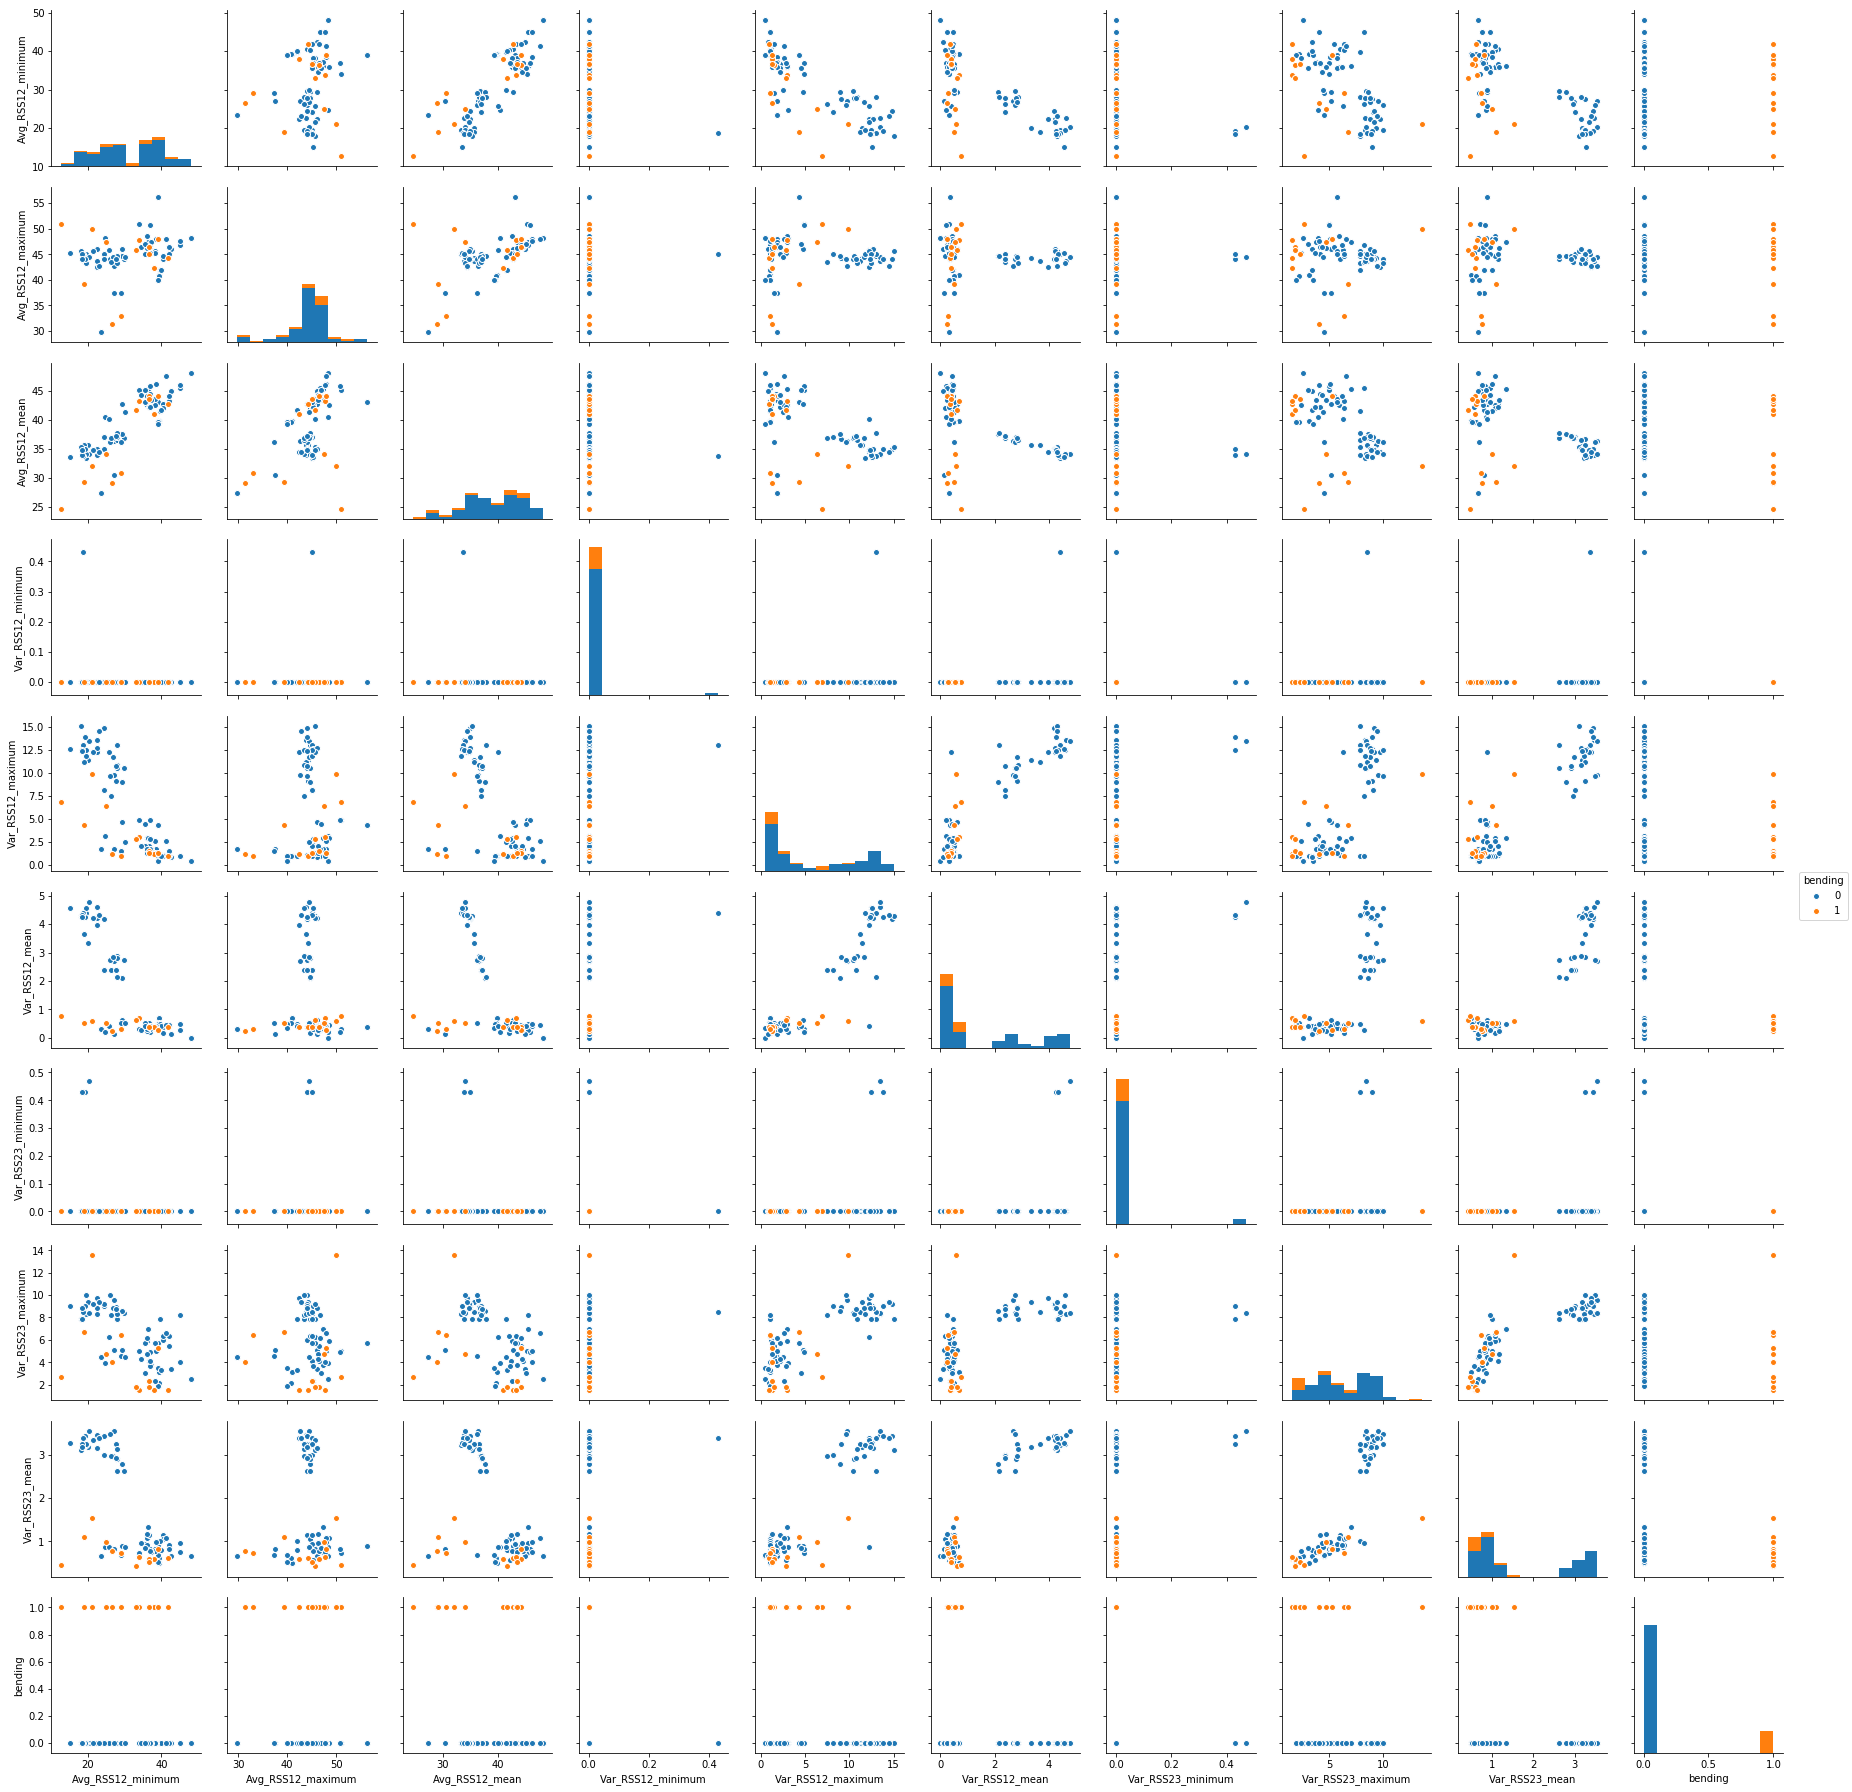

In [13]:
sns.pairplot(new_scatter_data, hue="bending")

## There is no difference in the scatter plots of 1(d)(i) and 1(d)(ii)

# Breaking each time series in my testing set into l ∈ {1, 2, . . . , 20} time series of approximately equal length

In [14]:
dataframs = list(testing_hash.values())
# datafram = dataframs.drop(["Time"], axis= 1)
# a = np.array_split(datafram, 2)
import pdb
l_hash_test = {}
for l in range(1,21):
    row = []
    for datafram in dataframs:
        datafram = datafram.drop(["Time"], axis = 1)
        a = np.array_split(datafram, l)
        df = pd.DataFrame()
        
        for index,i in enumerate(a):
            i.reset_index(drop=True,inplace=True)
            for col in i.columns:
                df[col + "_" + str(index+1)] = i[col]
            
        stat_per_dataframe = []
        names = []
        for index, col in enumerate(df.columns):
            mini = min(df[col])
            maxi = max(df[col])
            mean = stat.mean(df[col])
            median = stat.median(df[col])
            std = df[col].std()
            first_quartile = df[col].quantile(0.25)
            third_quartile = df[col].quantile(0.75)

            stat_per_dataframe.append(mini)
            stat_per_dataframe.append(maxi)
            stat_per_dataframe.append(mean)
            stat_per_dataframe.append(median)
            stat_per_dataframe.append(std)
            stat_per_dataframe.append(first_quartile)
            stat_per_dataframe.append(third_quartile)

            names.append(col + "_minimum")
            names.append(col + "_maximum")
            names.append(col + "_mean")
            names.append(col + "_median")
            names.append(col + "_standard deviation")
            names.append(col + "_first quartile")
            names.append(col + "_third quartile")

        row.append(stat_per_dataframe)
    new_df = pd.DataFrame(row, columns=names)
    new_df["bending"] = [1]*4 + [0]*15
    l_hash_test[l] = new_df

# Breaking each time series in my training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length as per 1(d)(iii)

In [15]:
dataframs = list(training_hash.values())
# datafram = dataframs.drop(["Time"], axis= 1)
# a = np.array_split(datafram, 2)
import pdb
l_hash = {}
for l in range(1,21):
    row = []
    for datafram in dataframs:
        datafram = datafram.drop(["Time"], axis = 1)
        a = np.array_split(datafram, l)
        df = pd.DataFrame()
        
        for index,i in enumerate(a):
            i.reset_index(drop=True,inplace=True)
            for col in i.columns:
                df[col + "_" + str(index+1)] = i[col]
            
        stat_per_dataframe = []
        names = []
        for index, col in enumerate(df.columns):
            mini = min(df[col])
            maxi = max(df[col])
            mean = stat.mean(df[col])
            median = stat.median(df[col])
            std = df[col].std()
            first_quartile = df[col].quantile(0.25)
            third_quartile = df[col].quantile(0.75)

            stat_per_dataframe.append(mini)
            stat_per_dataframe.append(maxi)
            stat_per_dataframe.append(mean)
            stat_per_dataframe.append(median)
            stat_per_dataframe.append(std)
            stat_per_dataframe.append(first_quartile)
            stat_per_dataframe.append(third_quartile)

            names.append(col + "_minimum")
            names.append(col + "_maximum")
            names.append(col + "_mean")
            names.append(col + "_median")
            names.append(col + "_standard deviation")
            names.append(col + "_first quartile")
            names.append(col + "_third quartile")

        row.append(stat_per_dataframe)
    new_df = pd.DataFrame(row, columns=names)
    new_df["bending"] = [1]*9 + [0]*60
    l_hash[l] = new_df

In [16]:
for key,val in l_hash_test.items():
    val.fillna(0, inplace=True)

In [17]:
for key,val in l_hash.items():
    val.fillna(np.mean(val.iloc[43]), inplace=True)

# Applying recursive feature elimination and 5-fold cross validation for l in (1..21) and storing the score for best number of features remaining as per 1(d)(iii)

In [18]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

l_score = {}
best_features_names_dataframe = {}
for i in range(1,21):
    xtrain = l_hash[i].drop(["bending"], axis=1)
    ytrain = l_hash[i]["bending"]

    log_reg = LogisticRegression()
    # The "accuracy" scoring is proportional to the number of correct
    # classifications
    rfecv = RFECV(estimator=log_reg, cv=StratifiedKFold(5),
                  scoring='accuracy')
    rfecv.fit(xtrain, ytrain)
    names = []
    for index, col in enumerate(xtrain.columns):
        if rfecv.support_[index] == True:
           names.append(col) 
    best_features_names_dataframe[i] = names
    l_score[i] = rfecv.grid_scores_[rfecv.n_features_ - 1]
    

In [19]:
l_score

{1: 0.9857142857142858,
 2: 0.9857142857142858,
 3: 1.0,
 4: 0.9857142857142858,
 5: 0.9857142857142858,
 6: 0.9714285714285715,
 7: 0.9857142857142858,
 8: 0.9857142857142858,
 9: 0.9714285714285715,
 10: 0.9714285714285715,
 11: 0.9714285714285715,
 12: 0.9714285714285715,
 13: 0.9857142857142858,
 14: 0.9857142857142858,
 15: 0.9714285714285715,
 16: 0.9714285714285715,
 17: 0.9714285714285715,
 18: 0.9857142857142858,
 19: 0.9714285714285715,
 20: 0.9857142857142858}

# Getting the best l as per 1(d)(iii)

In [20]:
optimal_l = [key for m in [max(l_score.values())] for key,val in l_score.items() if val == m][0]
optimal_l

3

# Right way and wrong way for cross validation? as per 1(d)(iii)

The wrong way to do time series cross validation is to use K-fold as K-fold does not contains time features. The right way is to use stratified cross validation 

In [21]:
# optimal_xtrain = best_features_training_dataframe[optimal_l]
ytrain = l_hash[optimal_l][["bending"]]
ytest = l_hash_test[optimal_l][["bending"]]


best_features_names_dataframe[optimal_l]

['Avg_RSS23_1_minimum',
 'Avg_RSS23_1_third quartile',
 'Avg_RSS12_2_third quartile',
 'Var_RSS23_3_maximum']

### Best features for best l

In [22]:
best_col_names = best_features_names_dataframe[optimal_l]

# The confusion matrix and show the ROC and AUC for my classifier on train data for best l with best features as per 1(d)(iv)

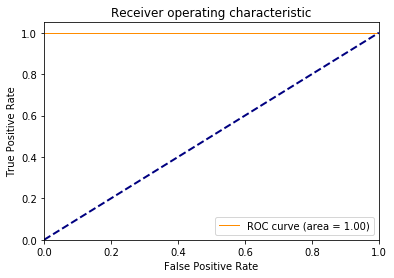

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

x_train = l_hash[optimal_l][best_col_names]
x_test = l_hash_test[optimal_l][best_col_names]
y_train = ytrain
y_test = ytest


clf = LogisticRegression()
clf.fit(x_train, y_train)
pred = clf.predict(x_train)


lw=2
fpr, tpr, thresholds = roc_curve(y_train, pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()




In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, pred)

array([[60,  0],
       [ 0,  9]])

# The parameters of my logistic regression βi’s as well as the p-values associated with them for best l with best features as per 1(d)(iv)

In [25]:
from patsy import dmatrices
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.discrete.discrete_model as sm

logit = sm.Logit(y_train, x_train).fit_regularized()
print(logit.params)
print(logit.pvalues)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.07877700732989e-10
            Iterations: 40
            Function evaluations: 45
            Gradient evaluations: 40
Avg_RSS23_1_minimum            2.393852
Avg_RSS23_1_third quartile    18.877688
Avg_RSS12_2_third quartile    -9.218630
Var_RSS23_3_maximum          -15.575264
dtype: float64
Avg_RSS23_1_minimum           1.0
Avg_RSS23_1_third quartile    1.0
Avg_RSS12_2_third quartile    1.0
Var_RSS23_3_maximum           1.0
dtype: float64


#  Testing my classfier for best l with best features as per and reporting the accuracy  obtained as per 1(d)(v)

In [26]:
clf = LogisticRegression().fit(x_train, ytrain)
clf.score(x_test, ytest)

1.0

The accuracy on the test set and train set cross-validation accuracy for the best 1 and best features is 1.0 and 1.0 respectively.

# Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?  as per 1(d)(vi)

### Yes

# Building a logistic regression model based on case-control sampling and adjusting its parameters as per 1(d)(vii)

In [27]:
df = x_train
df['bending'] = [1]*9 + [0]*60
from sklearn.utils import resample

df_majority = df[df.bending==0]
df_minority = df[df.bending==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=60,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.bending.value_counts()

df_upsampled

,Avg_RSS23_1_minimum,Avg_RSS23_1_third quartile,Avg_RSS12_2_third quartile,Var_RSS23_3_maximum,bending
9,8.67,19.0000,39.5625,8.62,0
10,7.67,20.2500,39.8125,9.18,0
11,4.00,18.3725,39.3300,8.26,0
12,0.00,18.6700,39.3300,7.89,0
13,9.75,21.3725,39.0625,11.15,0
14,7.00,21.5000,40.7500,9.34,0
15,2.50,17.5000,39.2500,8.61,0
16,3.00,17.7500,39.0000,8.04,0
17,8.67,18.0000,40.0000,9.50,0
18,8.00,18.7500,40.0000,7.73,0


# The confusion matrix, ROC, and AUC of the model as per 1(d)(vii)

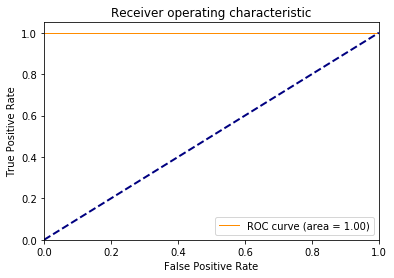

In [28]:
from sklearn.metrics import accuracy_score
y = df_upsampled.bending
X = df_upsampled.drop('bending', axis=1)
 
# Train model
clf_1 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_1 = clf_1.predict(X)
 
lw=2
fpr, tpr, thresholds = roc_curve(y, pred_y_1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [29]:
confusion_matrix(y, pred_y_1)

array([[60,  0],
       [ 0, 60]])

# Binary Classification Using L1-penalized logistic regression

# Repeating 1(d)(iii) using L1-penalized logistic regression and cross-validating on both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function as per 1(e)(i)

In [30]:
from sklearn.linear_model import LogisticRegressionCV

l_score = {}
for i in range(1,21):
    xtrain = l_hash[i].drop(["bending"], axis=1)
    ytrain = l_hash[i]["bending"]


    clf = LogisticRegressionCV(cv=5, penalty="l1", solver="liblinear").fit(xtrain, ytrain)
    score = clf.score(xtrain, ytrain) 
    l_score[i] = score

In [31]:
l_score

{1: 1.0,
 2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0,
 12: 1.0,
 13: 1.0,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 1.0,
 20: 1.0}

# Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement? as per 1(e)(ii)

The accuracy score for L1-penalized is more for all values of l, therfore I assume L1-penalized performs better. Also implementing L1-penalized was easy.

# Multi-class Classification (The Realistic Case)

# Repeating 1(e)(i) for multinomial regression as per 1(f)(1)

In [32]:
from sklearn.linear_model import LogisticRegressionCV

l_error = {}
l_train_score = {}
for i in range(1,21):
    xtrain = l_hash[i].drop(["bending"], axis=1)
    ytrain = l_hash[i][["bending"]]
    ytrain["result"] = [1]*9 + [2]*12 + [3]*12 + [4]*12 + [5]*12 + [6]*12
    ytrain = ytrain.result
    
    
    xtest = l_hash_test[i].drop(["bending"], axis=1)
    ytest = l_hash_test[i][["bending"]]
    ytest["result"] = [1]*4 + [2]*3 + [3]*3 + [4]*3 + [5]*3 + [6]*3
    ytest = ytest.result
    
    clf = LogisticRegressionCV(cv=5, penalty="l1", solver="liblinear").fit(xtrain, ytrain)
    test_error = 1 - clf.score(xtest, ytest) 
    l_train_score[i] = clf.score(xtrain, ytrain) 
    l_error[i] = test_error

In [33]:
l_error

{1: 0.052631578947368474,
 2: 0.1578947368421053,
 3: 0.21052631578947367,
 4: 0.21052631578947367,
 5: 0.26315789473684215,
 6: 0.10526315789473684,
 7: 0.26315789473684215,
 8: 0.21052631578947367,
 9: 0.42105263157894735,
 10: 0.1578947368421053,
 11: 0.1578947368421053,
 12: 0.1578947368421053,
 13: 0.10526315789473684,
 14: 0.42105263157894735,
 15: 0.26315789473684215,
 16: 0.21052631578947367,
 17: 0.4736842105263158,
 18: 0.21052631578947367,
 19: 0.26315789473684215,
 20: 0.21052631578947367}

# Finding best l as per 1(f)(i)

In [34]:
optimal_l = [key for m in [min(l_error.values())] for key,val in l_error.items() if val == m][0]
optimal_l

1

# Confusion matrices and ROC curves for multiclass classification for best L dataset as per 1(f)(i)

In [35]:
xtrain = l_hash[optimal_l].drop(["bending"], axis=1)
ytrain = l_hash[optimal_l][["bending"]]
ytrain["result"] = [1]*9 + [2]*12 + [3]*12 + [4]*12 + [5]*12 + [6]*12
ytrain = ytrain.result


xtest = l_hash_test[optimal_l].drop(["bending"], axis=1)
ytest = l_hash_test[optimal_l][["bending"]]
ytest["result"] = [1]*4 + [2]*3 + [3]*3 + [4]*3 + [5]*3 + [6]*3
ytest = ytest.result

clf_1 = LogisticRegression().fit(xtrain, ytrain)

pred_y_1 = clf_1.predict(xtest)

confusion_matrix(ytest, pred_y_1)

array([[4, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0],
       [0, 1, 0, 2, 0, 0],
       [0, 0, 1, 0, 2, 0],
       [0, 0, 0, 0, 0, 3]])

6


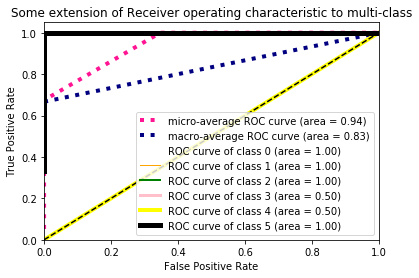

In [36]:
#plotting the ROC curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

xtrain = l_hash[optimal_l].drop(["bending"], axis=1)
ytrain = l_hash[optimal_l][["bending"]]
ytrain["result"] = [1]*9 + [2]*12 + [3]*12 + [4]*12 + [5]*12 + [6]*12
ytrain = ytrain.result
mc_train=label_binarize(ytrain,classes=[1,2,3,4,5,6])
n_classes = mc_train.shape[1]

xtest = l_hash_test[optimal_l].drop(["bending"], axis=1)
ytest = l_hash_test[optimal_l][["bending"]]
ytest["result"] = [1]*4 + [2]*3 + [3]*3 + [4]*3 + [5]*3 + [6]*3
ytest = ytest.result
mc_test=label_binarize(ytest,classes=[1,2,3,4,5,6])


lrcv=OneVsRestClassifier(LogisticRegressionCV(cv=StratifiedKFold(5),penalty="l1",solver="liblinear"))
lrcv.fit(xtrain,mc_train)
pred=lrcv.predict(xtest)
lrcvscore=lrcv.fit(xtrain,mc_train).decision_function(xtest)


fpr = dict()
tpr = dict()
roc_auc = dict()
print(n_classes)
for i in range(n_classes):
    fpr[i], tpr[i],threshold= roc_curve(mc_test[:, i],lrcvscore[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"],threshold= roc_curve(mc_test.ravel(),lrcvscore.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['blue', 'orange', 'green','pink',"yellow","black"])
lw=[0,1,2,3,4,5]
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,lw=lw[i],
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Gaussian Naive Baye's classifier for multiclassification as per 1(f)(ii)

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

l_score = {}
for i in range(1,21):
    xtrain = l_hash[i].drop(["bending"], axis=1)
    ytrain = l_hash[i][["bending"]]
    ytrain["result"] = [1]*9 + [2]*12 + [3]*12 + [4]*12 + [5]*12 + [6]*12
    ytrain = ytrain.result
    
    clf = GaussianNB()
    scores = cross_val_score(clf, xtrain, ytrain, cv=5)
    l_score[i] =  np.mean(scores)

In [38]:
l_score

{1: 0.8002673796791443,
 2: 0.861229946524064,
 3: 0.7641711229946524,
 4: 0.7611408199643493,
 5: 0.6788770053475937,
 6: 0.6993761140819965,
 7: 0.739126559714795,
 8: 0.762655971479501,
 9: 0.6694295900178252,
 10: 0.6611408199643494,
 11: 0.6993761140819965,
 12: 0.6940285204991088,
 13: 0.6557932263814618,
 14: 0.5772727272727273,
 15: 0.624331550802139,
 16: 0.6409982174688057,
 17: 0.6110516934046346,
 18: 0.5890374331550802,
 19: 0.5841354723707666,
 20: 0.5959001782531195}

# Multinomial Naive Baye's classifier for multiclassification as per 1(f)(ii)

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

l_score = {}
for i in range(1,21):
    xtrain = l_hash[i].drop(["bending"], axis=1)
    ytrain = l_hash[i][["bending"]]
    ytrain["result"] = [1]*9 + [2]*12 + [3]*12 + [4]*12 + [5]*12 + [6]*12
    ytrain = ytrain.result
    
    clf = MultinomialNB()
    scores = cross_val_score(clf, xtrain, ytrain, cv=5)
    l_score[i] =  np.mean(scores)

In [40]:
l_score

{1: 0.8317290552584671,
 2: 0.8514260249554366,
 3: 0.8381461675579323,
 4: 0.8381461675579323,
 5: 0.8381461675579323,
 6: 0.8445632798573974,
 7: 0.8548128342245989,
 8: 0.8381461675579323,
 9: 0.8445632798573974,
 10: 0.843048128342246,
 11: 0.8548128342245989,
 12: 0.861229946524064,
 13: 0.843048128342246,
 14: 0.843048128342246,
 15: 0.8548128342245989,
 16: 0.8548128342245989,
 17: 0.8548128342245989,
 18: 0.861229946524064,
 19: 0.8248663101604278,
 20: 0.861229946524064}

# Which method is better for multi-class classification in this problem? as per 1(f)(iii)

#### The multinomial naive bayes classifier has higher accuracy than gaussian naive bayes classifier for all values of l and therefore is better

# ISLR 3.7.4

Question:

I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. Y = β0 +β1X +β2X2 +β3X3 +ε

a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ε. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

(b) Answer (a) using test rather than training RSS.

(c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

(d) Answer (c) using test rather than training RSS.



#### Answer:

#### a) More the predictor, lesser will be the the RSS. The cubic regression will try to fit the data points more and therfore will have less residual sum of sqaures.

#### b) Since the cubic regression is overfitting the model, therefore it will have higher test RSS than simple regression.

#### c) The cubic regression will be able to handle the non-linearity of the model correctly and thus will have lower RSS compare to simple regression.

#### d) If we know the actual linearity of the model than only can we predict better RSS. If model's linearity is close to linear than RSS for simple regression will be lower and vice versa.
    
    

# ISLR 4.7.3

Question:

This problem relates to the QDA model, in which the observations within each class are drawn from a normal distribution with a class-specific mean vector and a class specific covariance matrix. We consider the simple case where p = 1; i.e. there is only one feature.
Suppose that we have K classes, and that if an observation belongs to the kth class then X comes from a one-dimensional normal dis- tribution, X ∼ N(μk,σk2). Recall that the density function for the one-dimensional normal distribution is given in (4.11). Prove that in this case, the Bayes’ classifier is not linear. Argue that it is in fact quadratic.

Hint: For this problem, you should follow the arguments laid out in Section 4.4.2, but without making the assumption that σ12 = . . . = σK2 .

#### Find answer in attached pdf under the name "solution_4.7.3.pdf"

# ISLR 4.7.7

Question:

Suppose that we wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on X, last year’s percent profit. We examine a large number of companies and discover that the mean value of X for companies that issued a dividend was X ̄ = 10, while the mean for those that didn’t was X ̄ = 0. In addition, the variance of X for these two sets of companies was σˆ2 = 36. Finally, 80 % of companies issued dividends. Assuming that X follows a nor- mal distribution, predict the probability that a company will issue a dividend this year given that its percentage profit was X = 4 last year.

Hint: Recall that the density function for a normal random variable is f(x) = √ 1 e−(x−μ)2/2σ2 . You will need to use Bayes’ theorem.

#### Find answer in attached pdf under the name "solution_4.7.7.pdf"